## Create a pair-wise plot in order to examine relationships between variables in the cycling data collected during a trainer session  1/24/2020
### This script will help us examine:  
(1) the relationship between features  
(2) the presence of outliers  
(3) the distribution of data  

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,secs,cad,hr,km,kph,nm,watts,alt,lon,lat,...,interval,lrbalance,lte,rte,lps,rps,smo2,thb,o2hb,hhb
0,1,54,0,0.00394,14.1588,0,0,89.0,0,0,...,0,-255,0,0,0,0,0,0,0,0
1,2,54,0,0.00790,14.2848,0,0,89.0,0,0,...,0,-255,0,0,0,0,0,0,0,0
2,3,55,0,0.01187,14.2848,0,0,89.0,0,0,...,0,-255,0,0,0,0,0,0,0,0
3,4,55,0,0.01584,14.2848,0,0,89.8,0,0,...,0,-255,0,0,0,0,0,0,0,0
4,5,56,0,0.01981,14.2848,0,0,88.8,0,0,...,0,-255,0,0,0,0,0,0,0,0


### Before we look at the table information, let's delete some unneeded features and rename the remaining features

In [5]:
# Drop un-needed columns
df.drop([' km',' nm',' alt',' lon',' lat',' headwind',' slope',' temp',' lrbalance',' lte',' rte',' smo2',' thb',' o2hb',' hhb',' lps',' rps',' interval','secs'], axis=1, inplace=True)

# Rename some features
df_selectedfeatures = df.rename(columns={' cad':'SmO2', ' hr':'HR', ' kph':'tHb', ' watts':'wattage'}, inplace=False)

In [6]:
# Filter out all rows containing a zero value because we only want to look at data while the athelete was under-power
df_filtered = df_selectedfeatures[(df_selectedfeatures != 0).all(axis=1)]

#  Renumerate the index because we dropped observations (rows)
df_filtered.index = pd.RangeIndex(len(df_filtered.index))

# Check for any NaN (Not a Number) cell entries
#df_filtered.count()
df_filtered.isnull().sum()

SmO2       0
HR         0
tHb        0
wattage    0
dtype: int64

### We see above that there are zero NaN entries in our four features. Thus, we don't have to consider replacing or removing more values.

### Now that we've shaped the dataset, lets look at the table information and data types

In [7]:
# Check the dataframe information
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 4 columns):
SmO2       6057 non-null int64
HR         6057 non-null int64
tHb        6057 non-null float64
wattage    6057 non-null int64
dtypes: float64(1), int64(3)
memory usage: 189.4 KB


### We see that:    
#### * There are 6057 numerical observations comprised within four features (columns)
#### * Residual muscle oxygen (SmO2), heart rate (HR), and wattage (W) are Dtype int 64  
#### * Total hemoglobin (tHb) is Dtype float64  

### Now lets look at some basic descriptive statistics for the features

In [8]:
df_filtered.describe()

,SmO2,HR,tHb,wattage
count,6057.000000,6057.000000,6057.000000,6057.000000
mean,45.588905,148.645039,30.947326,221.879148
std,3.418816,19.176864,2.338716,33.152463
min,37.000000,78.000000,16.232400,44.000000
25%,43.000000,141.000000,30.340800,207.000000
50%,45.000000,148.000000,31.082400,224.000000
75%,48.000000,164.000000,32.400000,242.000000
max,58.000000,176.000000,35.823600,345.000000


### In the result above, we see the descriptive statistics that summarize the central tendency, dispersion and shape of our dataset’s distribution, excluding NaN values.

### Exploratory Data Analysis (EDA): Lets visualize the pair-wise correlations between the different features of this dataset

In [9]:
# Import libraries
from matplotlib import pyplot as plt
import seaborn as sns

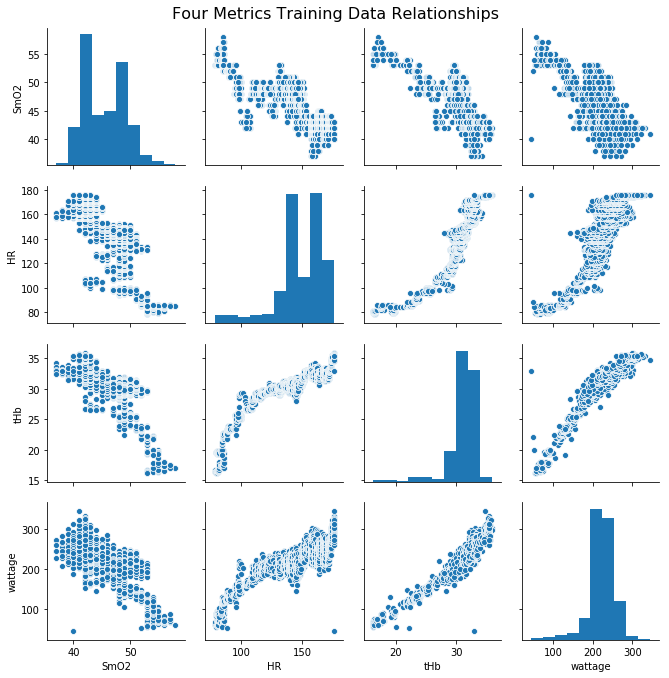

In [10]:
# Create the plot object
sns.pairplot(df_filtered)    # height=2.5 (omit, adjust subplots below as needed)

# set title, subtitle, labels, ticks, legend, adjust subplot
# plt.title('title')
plt.suptitle('Four Metrics Training Data Relationships', fontsize=16)
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(['foo'])
# plt.legend([])    # loc='lower left'
plt.subplots_adjust(left=.10, bottom=.10, right=.95, top=.95, wspace=.15, hspace=.15)

### There we have it. Comparing the metrics of SmO2, HR, and tHb to the wattage output of our athlete, we see that:  
#### * SmO2 has strong, likely linear, negative relationship to wattage  
#### * HR has a strong, likely linear or possibly non-linear relationship to wattage  
#### * tHb has a strong, non-linear relationship to wattage  

### Outliers: There may be several instances located in the lower (<50W) range which require a closer look  

### SmO2 and HR do not appear to have a normal distribution. tHb and wattage may be normally distributed although there may be some skewness in the lower range. 
